In [2]:
from utils.deep_audio_utils import plot_waveform
import matplotlib.pyplot as plt
import librosa
import numpy as np
import scipy
import librosa.display

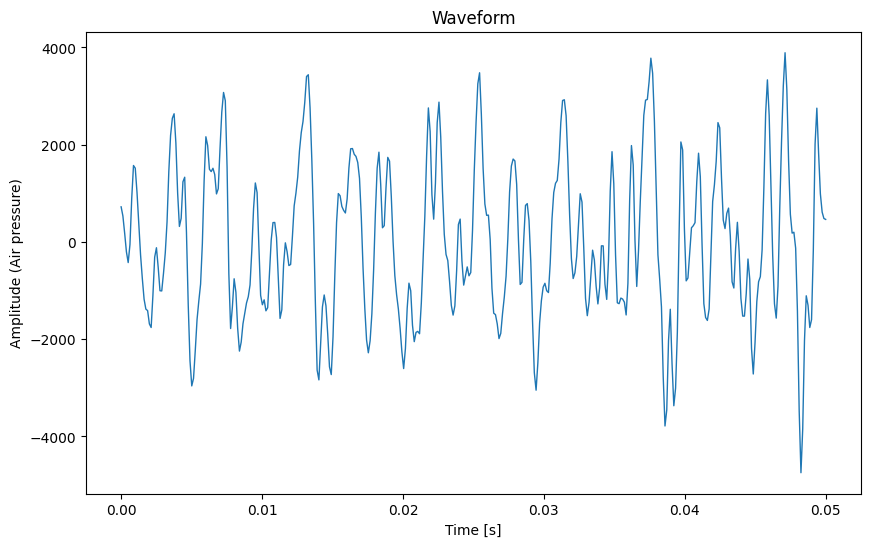

In [3]:
plot_waveform(src='data/023 Adele - Someone Like You.wav', start=5., dur=0.05)

In [4]:
y, sr = librosa.load(
    '/home/christos/projects/deep-audio-fingerprinting/data/piano_a4.wav', sr=44100, offset=0.4, duration=0.01
)


In [5]:
x = np.linspace(start=0, stop=0.01, num=int(0.01 * sr))

In [6]:
F_s = 4
step = int(sr * 1e-3 / F_s)
x_1 = x[::step]
y_1 = y[::step]

F_s_2 = 8
step_2 = int(sr * 1e-3 / F_s_2)
x_2 = x[::step_2]
y_2 = y[::step_2]

/tmp/ipykernel_5050/3227219095.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(x_ticks.astype(int))


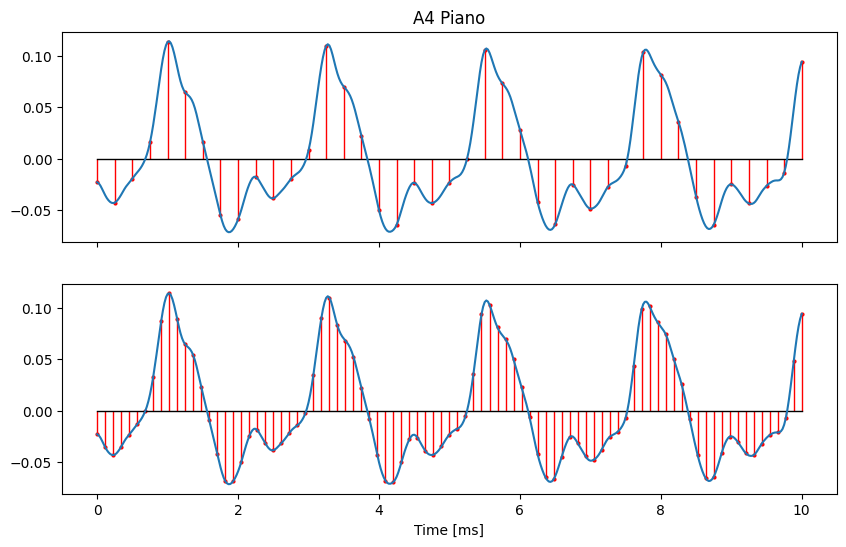

In [7]:
fig, ax = plt.subplots(figsize=(10, 6), nrows=2, sharex=True)
markerline, stemline, baseline = ax[0].stem(x_1, y_1)
plt.setp(markerline, markersize=2, color='red')
plt.setp(stemline, linewidth=1, color='red')
plt.setp(baseline, linewidth=1, color='black')
ax[0].plot(x, y)

markerline, stemline, baseline = ax[1].stem(x_2, y_2)
ax[1].plot(x, y)
plt.setp(markerline, markersize=2, color='red')
plt.setp(stemline, linewidth=1, color='red')
plt.setp(baseline, linewidth=1, color='black')
x_ticks = ax[1].get_xticks() * 1000
ax[1].set_xticklabels(x_ticks.astype(int))
ax[1].set_xlabel('Time [ms]')

ax[0].set_title('A4 Piano')
plt.savefig('images/piano_a4_sampling.pdf', format='pdf')
plt.show()

In [8]:
def signal(t, sr=8000):
    if t <= 5.:
        return np.sin(2 * np.pi * t)
    else:
        return np.sin(10 * np.pi * t)

def window(t, dur=4, shift=0.):
    l = dur // 2
    if abs(t-shift) <= l:
        return 1
    else:
        return 0

In [9]:
t = np.linspace(start=0, stop=10, num=10 * 8_000)
vec_signal = np.vectorize(signal)
vec_window = np.vectorize(window)
shifts = [3, 5, 7]
sr = 8000

In [11]:
from scipy.fft import fft

In [12]:
win_signal = vec_window(t, shift=7) * vec_signal(t)
y = fft(win_signal[5 * sr: 9 * sr])

In [13]:
z = np.abs(y)
np.argmax(z)

20

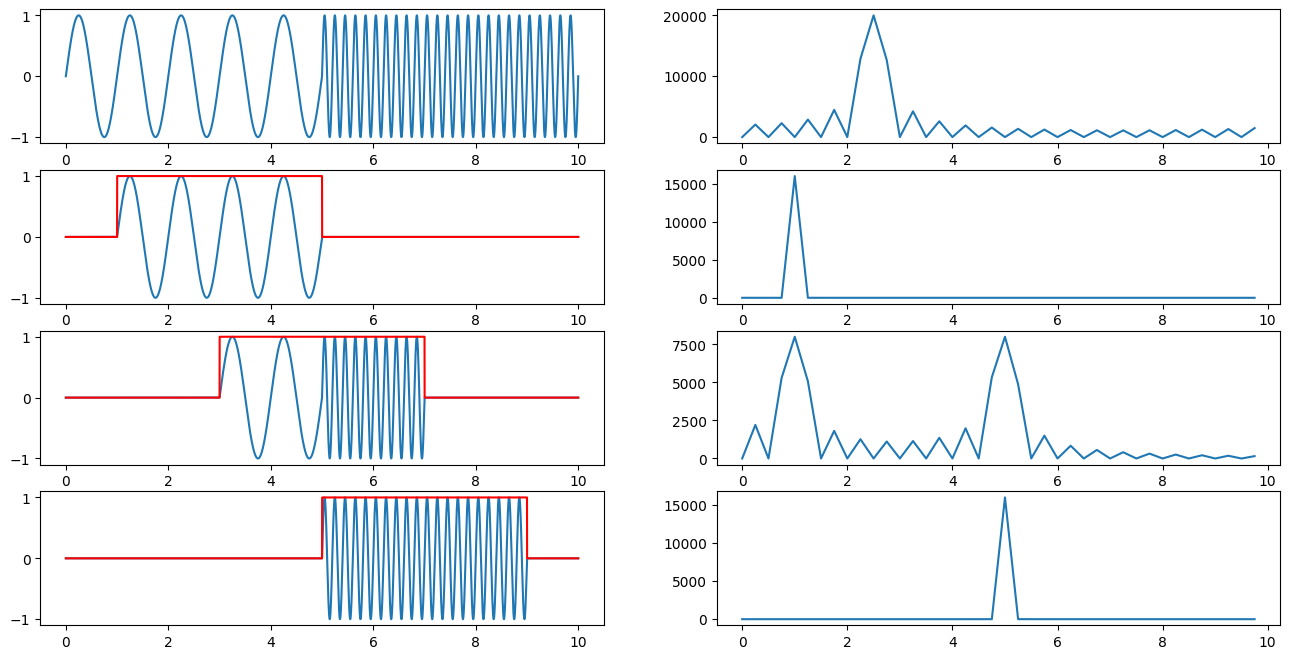

In [14]:
fig, ax = plt.subplots(figsize = (16, 8), nrows=4, ncols=2)
ax[0, 0].plot(t, vec_signal(t))
z = np.abs(fft(vec_signal(t)))
frequencies = 0.25 * np.arange(40)
ax[0, 1].plot(frequencies, z[:40])
for i, shift in enumerate(shifts, 1):
    windowed = vec_window(t, shift=shift) * vec_signal(t)
    ax[i, 0].plot(t, windowed)
    ax[i, 0].plot(t, vec_window(t, shift=shift), color='red')
    start, end = int(sr * (shift - 2)), int(sr * (shift + 2))
    z = np.abs(fft(windowed[start: end]))
    ax[i, 1].plot(frequencies, z[:40])
# plt.savefig('images/stft_windows.pdf', format='pdf')
plt.show()

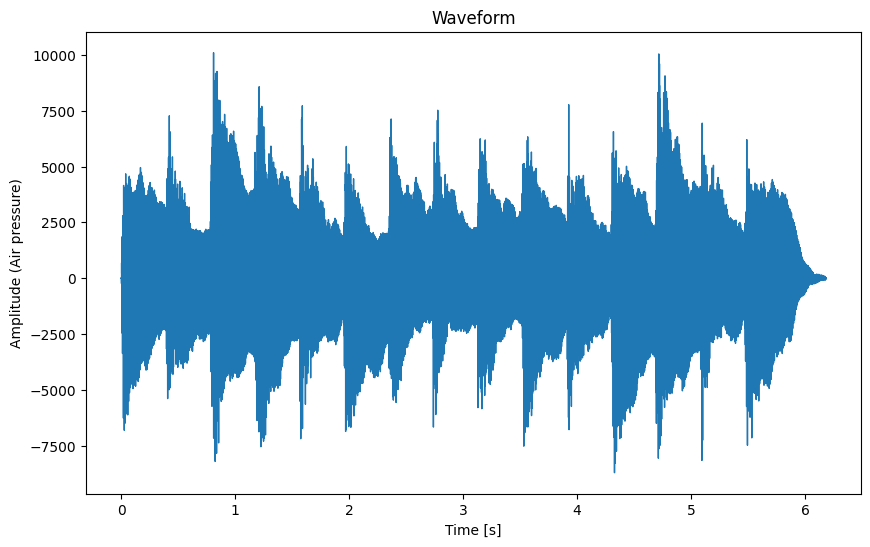

In [2]:
plot_waveform(src='data/c_major_scale.wav', sr=8000)

In [3]:
y, sr = librosa.load('data/c_major_scale.wav', sr=8000)

In [13]:
z = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(z), ref=np.max)

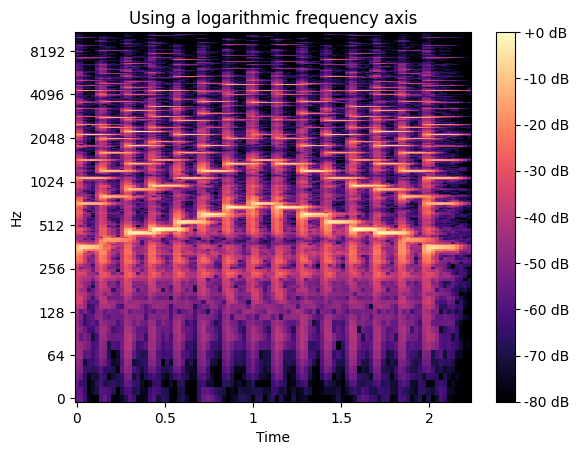

In [14]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Using a logarithmic frequency axis')
fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

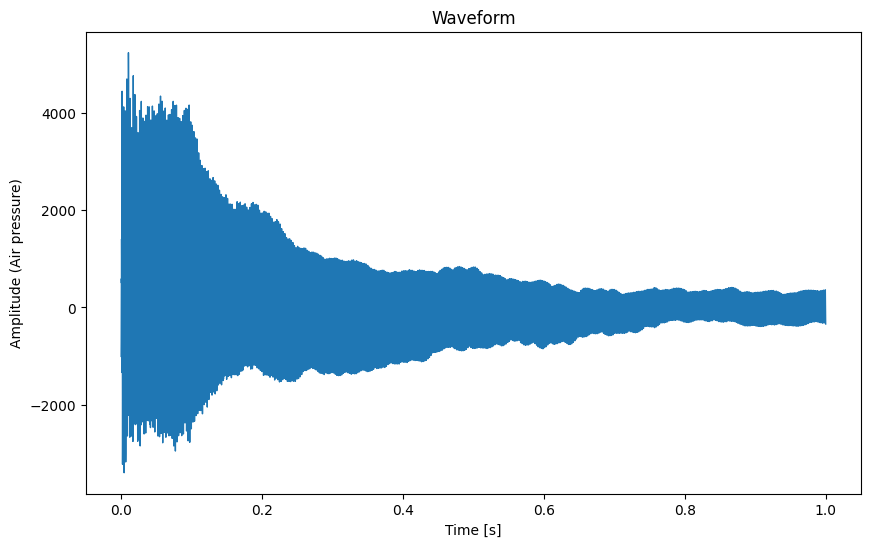

In [103]:
plot_waveform(src='data/piano_a4.wav', sr=8000, start=0.3, dur=1)

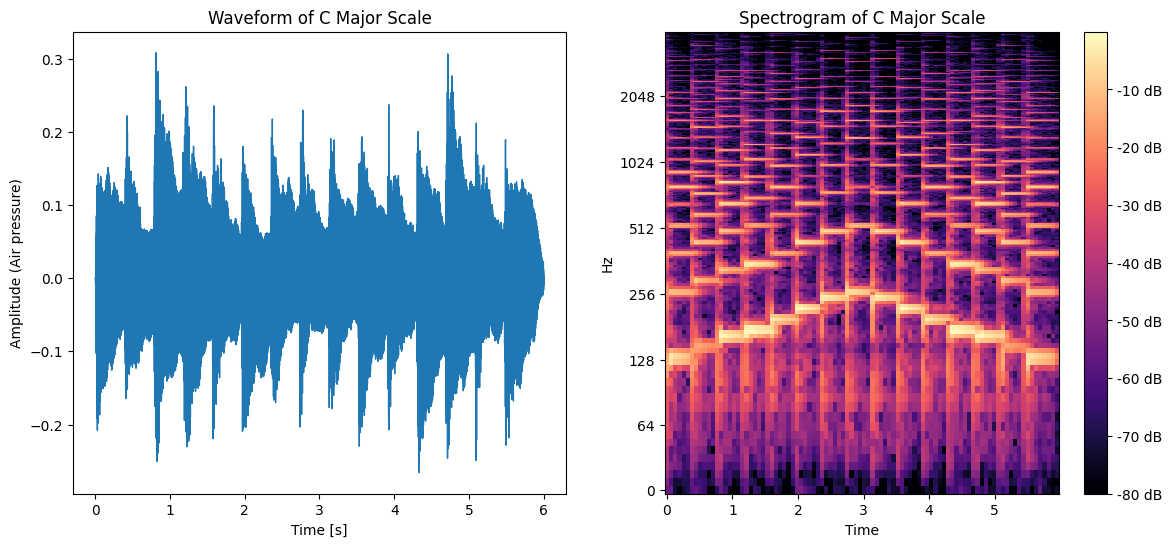

In [129]:
y, sr = librosa.load('data/c_major_scale.wav', sr=8000)
dur = int(y.size // sr)
z = librosa.stft(y[: int(dur * sr)], n_fft=1024, hop_length=512)
x = np.linspace(start=0, stop=dur, num=int(dur * sr))
S_db = librosa.amplitude_to_db(np.abs(z), ref=np.max)
fig, ax = plt.subplots(figsize = (14, 6), ncols=2)
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax[1], n_fft=1024, sr=8000, hop_length=512)
ax[1].set(title='Spectrogram of C Major Scale')
fig.colorbar(img, ax=ax[1], format="%+2.f dB")
ax[0].plot(x, y[: int(dur * sr)], linewidth=1)
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude (Air pressure)')
ax[0].set_title('Waveform of C Major Scale')
plt.savefig('images/c_major_scale.pdf', format='pdf')
plt.show()